Import the libraries necessary to analize data

In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df = pd.read_csv('df_after_dp.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197925 entries, 0 to 197924
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            197925 non-null  datetime64[ns]
 1   state                           197925 non-null  object        
 2   city_or_county                  197925 non-null  object        
 3   latitude                        197925 non-null  float64       
 4   longitude                       197925 non-null  float64       
 5   congressional_district          197925 non-null  int64         
 6   participant_age1                135327 non-null  float64       
 7   participant_age_group1          160339 non-null  object        
 8   participant_gender1             165727 non-null  object        
 9   min_age_participants            135331 non-null  float64       
 10  avg_age_participants            135327 non-null  float64

Since we use distance metric working on numerical features we remove the categorical data. 

In [6]:
column_to_drop = ['date']
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['date',
 'state',
 'city_or_county',
 'participant_age_group1',
 'participant_gender1',
 'incident_characteristics1',
 'incident_characteristics2',
 'party']

In [7]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [8]:
df_numeric = df.drop(columns=column_to_drop)
df_numeric

,latitude,longitude,congressional_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,...,totalvotes,substitute_values,males_percentage,killed_percentage,injured_percentage,killed_percentage_per_incident,unharmed_percentage,year,month,day
0,39.119550,-76.708250,4,17.0,17.0,17.0,17.0,0.0,1.0,0.0,...,320650,1.0,1.000000,0.0,0.034483,0.0,0.00000,2017,2,4
1,39.122636,-76.709382,3,25.0,25.0,25.0,25.0,0.0,0.0,1.0,...,339675,1.0,0.066667,0.0,0.000000,0.0,0.00000,2016,1,14
2,36.145695,-95.934236,1,28.0,28.0,28.0,28.0,0.0,0.0,2.0,...,1,2.0,0.002506,0.0,0.000000,0.0,0.00000,2017,12,22
3,39.119550,-76.708250,3,35.0,35.0,35.0,35.0,0.0,0.0,1.0,...,215946,1.0,1.000000,0.0,0.000000,0.0,0.00000,2015,3,3
4,38.970380,-76.502863,4,50.0,50.0,50.0,50.0,0.0,0.0,1.0,...,191837,1.0,0.021277,0.0,0.000000,0.0,0.00000,2015,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197920,20.238300,-155.837000,2,28.0,27.0,28.0,28.0,0.0,0.0,2.0,...,198121,2.0,1.000000,NaN,0.000000,0.0,0.00000,2018,1,22
197921,19.512500,-154.922000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198121,1.0,1.000000,NaN,0.000000,0.0,3.49192,2018,2,9
197922,19.200000,-155.480000,2,33.0,33.0,33.0,33.0,0.0,0.0,1.0,...,198121,1.0,NaN,NaN,0.000000,0.0,0.00000,2018,1,7
197923,19.112700,-155.757000,2,32.0,31.0,42.0,64.0,0.0,0.0,3.0,...,198121,3.0,1.000000,NaN,1.000000,0.0,0.00000,2018,3,5


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric.values)

# K-means

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

Knee Method to estimate the best K

In [31]:
null_cols = []
for i in df_numeric.columns:
    if df_numeric[i].isna().any():
        null_cols.append(i)

df_numeric = df_numeric.drop(columns=null_cols)
df_numeric = df_numeric.drop(columns=['year', 'day', 'month'])

In [34]:
X = scaler.fit_transform(df_numeric.values)

In [45]:
sse_list = list()
label_list = []
min_k = 30
max_k = 100
for k in range(min_k, max_k + 1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_
    sse_list.append(sse)
    label_list.append(labels)

In [39]:
for sse in sse_list:
    print('SSE %s' % sse) # cohesion, lower value better clustering (error minimization)
    #for labels in label_list:
        #print('Separation %s' % metrics.davies_bouldin_score(X, labels)) # lower value, better clustering (minimum zero)
    #    print('Silhouette %s' % silhouette_score(X, labels))

SSE 546922.1853693364
SSE 487692.6103292091
SSE 443121.01278193126


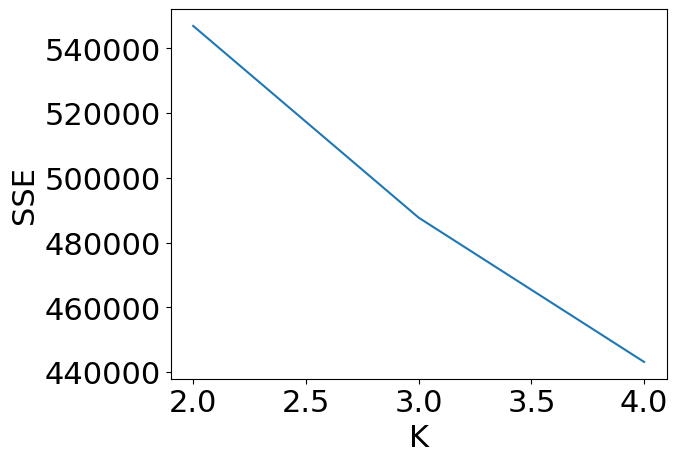

In [44]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

Selecting one state as stated in subtask of clustering task.

In [51]:
df['state'].value_counts() #to find state with most crimes

state
illinois          15935
california        13843
florida           12665
texas             11024
new york           8708
ohio               8602
georgia            7634
pennsylvania       7529
north carolina     7254
louisiana          6670
tennessee          6282
missouri           6054
south carolina     5886
massachusetts      5274
michigan           5004
virginia           4845
indiana            4828
new jersey         4693
maryland           4477
alabama            4388
wisconsin          4266
kentucky           3456
oklahoma           3069
mississippi        2990
washington         2901
colorado           2832
connecticut        2731
arkansas           2500
iowa               2333
oregon             2001
arizona            1984
kansas             1949
minnesota          1715
nevada             1589
new mexico         1479
nebraska           1318
west virginia      1285
alaska             1276
utah                916
new hampshire       858
maine               844
rhode isla

In [58]:
#df_numeric['state'] = df['state']
df_numeric_illinois = df_numeric[df_numeric['state'] == 'illinois']
df_numeric_illinois = df_numeric_illinois.drop(columns='state')
X_illinois = scaler.fit_transform(df_numeric_illinois.values)

#TODO: model selection

In [70]:
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X_illinois)

DBSCAN(eps=0.15, min_samples=10)

Observing the size of each cluster

In [71]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

In [72]:
print('Silhouette %s' % silhouette_score(X_illinois, dbscan.labels_))

Silhouette 0.44891343336808875


In [ ]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])